# Hierarchial Clustering

## Import Libraries & DataSets

In [1]:
import matplotlib.pyplot as plt  
import pandas as pd  
%matplotlib inline 
import numpy as np  

In [2]:
customer_data = pd.read_csv('C:/Users/aksin52/Documents/Learnbay Stats ML Curriculum/Cust_Spend_Data.csv')

In [3]:
customer_data.shape  

(10, 7)

In [5]:
customer_data

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,A,10000,2,1,1,0
1,2,B,7000,3,0,10,9
2,3,C,7000,7,1,3,4
3,4,D,6500,5,1,1,4
4,5,E,6000,6,0,12,3
5,6,F,4000,3,0,1,8
6,7,G,2500,5,0,11,2
7,8,H,2500,3,0,1,1
8,9,I,2000,2,0,2,2
9,10,J,1000,4,0,1,7


In [4]:
data=customer_data.drop(['Cust_ID','Name'],axis=1)
data.head()

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,10000,2,1,1,0
1,7000,3,0,10,9
2,7000,7,1,3,4
3,6500,5,1,1,4
4,6000,6,0,12,3


In [5]:
from sklearn.preprocessing import StandardScaler
stdsc=StandardScaler()
X_data=pd.DataFrame(stdsc.fit_transform(data),index=data.index,columns=data.columns).add_suffix('_std')

In [6]:
X_data

,Avg_Mthly_Spend_std,No_Of_Visits_std,Apparel_Items_std,FnV_Items_std,Staples_Items_std
0,1.886498,-1.240347,1.527525,-0.741433,-1.380131
1,0.787567,-0.620174,-0.654654,1.280656,1.725164
2,0.787567,1.860521,1.527525,-0.292080,0.000000
3,0.604412,0.620174,1.527525,-0.741433,0.000000
4,0.421257,1.240347,-0.654654,1.730009,-0.345033
5,-0.311364,-0.620174,-0.654654,-0.741433,1.380131
6,-0.860829,0.620174,-0.654654,1.505333,-0.690066
7,-0.860829,-0.620174,-0.654654,-0.741433,-1.035098
8,-1.043984,-1.240347,-0.654654,-0.516756,-0.690066
9,-1.410294,0.000000,-0.654654,-0.741433,1.035098


In [7]:
data

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,10000,2,1,1,0
1,7000,3,0,10,9
2,7000,7,1,3,4
3,6500,5,1,1,4
4,6000,6,0,12,3
5,4000,3,0,1,8
6,2500,5,0,11,2
7,2500,3,0,1,1
8,2000,2,0,2,2
9,1000,4,0,1,7


## Run Dendogram based hierarchial clustering

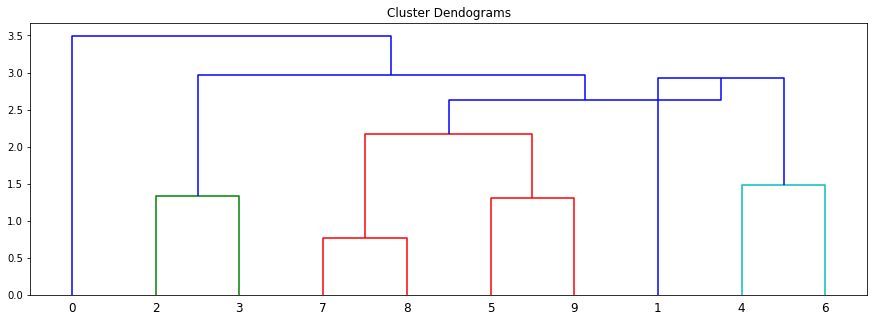

In [21]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(15, 5))  
plt.title("Cluster Dendograms")  
dend = shc.dendrogram(shc.linkage(X_data, method='centroid'))  

## Building the clusters 

In [37]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')  

cluster_label=cluster.fit_predict(X_data)

data['cluster_label']=pd.DataFrame(cluster_label)

In [25]:
data

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,cluster_label
0,10000,2,1,1,0,3
1,7000,3,0,10,9,0
2,7000,7,1,3,4,1
3,6500,5,1,1,4,1
4,6000,6,0,12,3,0
5,4000,3,0,1,8,2
6,2500,5,0,11,2,0
7,2500,3,0,1,1,2
8,2000,2,0,2,2,2
9,1000,4,0,1,7,2


In [38]:
data['cluster_label'].value_counts()

2    4
1    3
0    3
Name: cluster_label, dtype: int64

In [39]:
data.groupby('cluster_label')['Avg_Mthly_Spend','No_Of_Visits','Apparel_Items','FnV_Items','Staples_Items'].agg(['mean'])

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
,mean,mean,mean,mean,mean
cluster_label,,,,,
0,7833.333333,4.666667,1,1.666667,2.666667
1,5166.666667,4.666667,0,11.000000,4.666667
2,2375.000000,3.000000,0,1.250000,4.500000


## Plot the clusters using Swarmplots

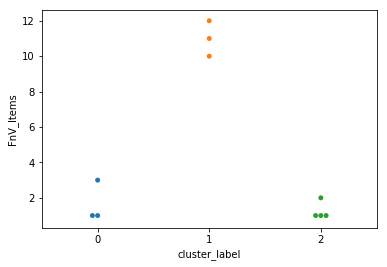

In [40]:
import seaborn as sns
ax=sns.swarmplot(x="cluster_label",y="FnV_Items",data=data)